In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sn

In [15]:
#read features from csv file
df = pd.read_csv('features.csv')
df.set_index('filename', inplace=True)

In [16]:
y = df['genre']
X = df.iloc[:, 1:]

In [17]:
#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=666, solver='liblinear', max_iter=100, multi_class='ovr', 
                             verbose=0, warm_start=False, n_jobs=None)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [19]:
print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

Precision: 63.000%
Recall: 63.000%
Accuracy: 63.000%


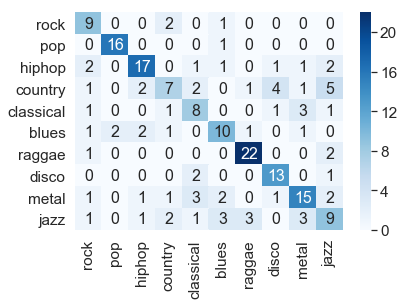

In [20]:
#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

In [21]:
#classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.53      0.75      0.62        12
   classical       0.89      0.94      0.91        17
     country       0.74      0.68      0.71        25
       disco       0.50      0.30      0.38        23
      hiphop       0.47      0.53      0.50        15
        jazz       0.56      0.56      0.56        18
       metal       0.81      0.88      0.85        25
         pop       0.65      0.81      0.72        16
      reggae       0.62      0.58      0.60        26
        rock       0.41      0.39      0.40        23

   micro avg       0.63      0.63      0.63       200
   macro avg       0.62      0.64      0.62       200
weighted avg       0.62      0.63      0.62       200



In [22]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.63


In [23]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

reggae       26
country      25
metal        25
rock         23
disco        23
jazz         18
classical    17
pop          16
hiphop       15
blues        12
Name: genre, dtype: int64

In [24]:
#now to try with some outside data
new_data = pd.read_csv("demo_features.csv")

In [25]:
X = new_data.iloc[:, 1:]
y_pred = log_reg.predict(X)
print('Predicted values:\n {}'.format(y_pred))

Predicted values:
 ['hiphop' 'classical' 'blues' 'reggae' 'jazz' 'country' 'country' 'disco'
 'jazz' 'jazz']
